**SUDOKO SOLVER**

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

#importing necessary libraries for the project

In [9]:
def is_valid(board, row, col, num, N):
    k = int(math.sqrt(N))
    for i in range(N):
        if board[row][i] == num or board[i][col] == num:
            return False
    start_row, start_col = (row // k) * k, (col // k) * k
    for i in range(k):
        for j in range(k):
            if board[start_row + i][start_col + j] == num:
                return False
    return True


In [10]:
def solve_sudoku(board, N):
    for row in range(N):
        for col in range(N):
            if board[row][col] == 0:
                for num in range(1, N + 1):
                    if is_valid(board, row, col, num, N):
                        board[row][col] = num
                        if solve_sudoku(board, N):
                            return True
                        board[row][col] = 0
                return False
    return True


In [11]:
def draw_sudoku(board):
    N = len(board)
    k = int(np.sqrt(N))

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks(np.arange(N+1)-0.5, minor=True)
    ax.set_yticks(np.arange(N+1)-0.5, minor=True)

    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

    for i in range(N):
        for j in range(N):
            if board[i][j] != 0:
                ax.text(j, i, str(board[i][j]), ha='center', va='center', fontsize=16, color='blue')

    for i in range(0, N+1, k):
        ax.axhline(i-0.5, color='black', linewidth=4)
        ax.axvline(i-0.5, color='black', linewidth=4)

    plt.show()


In [12]:
sudoku_board_9x9 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]


Initial Sudoku Board:


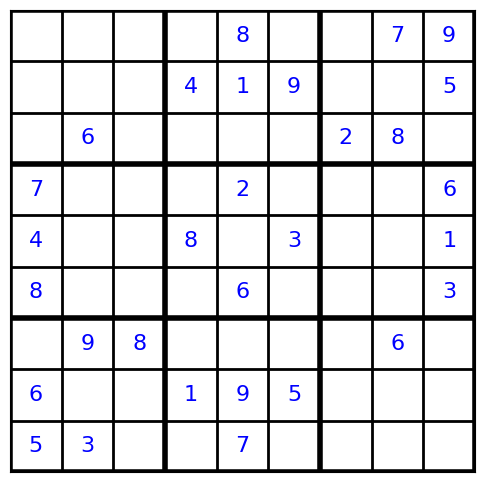

Solved Sudoku Board:


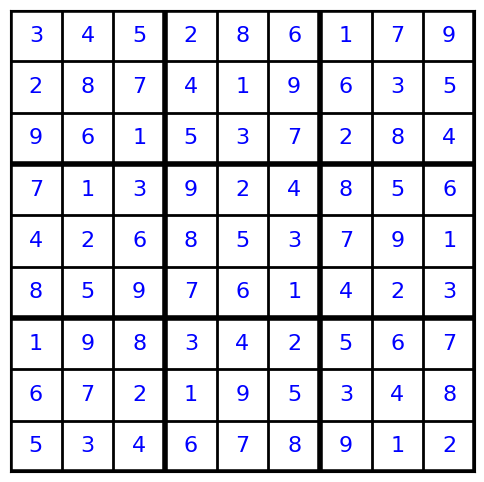

In [13]:
N_9 = 9

print("Initial Sudoku Board:")
draw_sudoku(sudoku_board_9x9)

if solve_sudoku(sudoku_board_9x9, N_9):
    print("Solved Sudoku Board:")
    draw_sudoku(sudoku_board_9x9)
else:
    print("No solution exists.")
